In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandas
import urllib
import re

from selenium import webdriver
from time import sleep
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys

from selenium.common.exceptions import NoSuchElementException, WebDriverException

import csv
import time

from tqdm import tqdm_notebook as tqdm

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

import pandas as pd
from sodapy import Socrata

import numpy as np
import datetime

import pandas as pd
pd.set_option("display.max_columns", 2200)
pd.set_option("display.max_rows", 200)
import numpy as np
import seaborn  as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline  
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
import re
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Keeping track of runtime.
import timeit

# Decision trees
from sklearn import tree
from IPython.display import Image

# Packages for rendering tree.
import pydotplus
import graphviz

import itertools #(for confusion matrix)

from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize

from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import requests as re
import tkinter as tk
from tkinter import font

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [ ]:
#A quick look at https://www.leafly.com/explore/page-61/sort-alpha shows 
#that this is the last page of strains
pages = 61 
websites = []
strain_names = []

for i in range(pages+1):
    page_url = "https://www.leafly.com/explore/page-"+str(i)+"/sort-alpha"
    html = requests.get(page_url).text
    soup = BeautifulSoup(html,'html.parser')
    urls = soup.findAll("a",{"class":"ga_Explore_Strain_Tile"})
        
    for url in urls:
        strain_name = url.get('href')
        strain_names.append(strain_name)
        website = ("https://www.leafly.com" + strain_name)
        websites.append(website)

In [ ]:
#create url df
url_df = pd.DataFrame(websites, columns = ['url'])

In [ ]:
#create url csv
url_df.to_csv('urls.csv')

In [ ]:
#create strain_names csv
strains_df = pd.DataFrame(strain_names, columns = ['strain_name'])

In [ ]:
#create strain_names csv
strains_df.to_csv('strains.csv')

In [ ]:
#parse strain_name:
parsed =[]
for words in strains_df['strain_name']:
    parse = re.findall(r"[\w']+", words)
    parsed.append(parse)

In [ ]:
#create name and strain df

strain_type_df = pd.DataFrame(parsed, columns = ['strain', 'name1', 'name2',
                                    'name3', 'name4', 'name5', 'name6'])

In [ ]:
#drop last 5 columns - just fillers
strain_type_df.drop(df.tail(5).index,inplace=True)

In [ ]:
#merge name columns
strain_type_df['name'] = strain_type_df[strain_type_df.columns[1:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1)

In [ ]:
#drop unnecessary columns
strain_type_df.drop(['name1', 'name2', 'name3', 'name4', 'name5', 'name6'], axis=1, inplace=True)

In [ ]:
strain_type_df.to_csv('strain_type.csv')

In [ ]:
#number of duplicates
df['name'].duplicated().sum()

In [ ]:
url_df['url'].duplicated().sum()

In [ ]:
url_df.drop_duplicates(inplace=True)

In [ ]:
url_df.reset_index()

In [ ]:
len(url_df)

In [ ]:
#breaking down scraping into smaller buckets

urls_to_200 = urls_df['url'][:200]          #soups
urls_to_700 = urls_df['url'][200:700]       #soups_to_700
urls_to_1200 = urls_df['url'][700:1200]     #soups_to_1200
urls_to_1700 = urls_df['url'][1200:1700]    #soups_to_1700
urls_to_2200 = urls_df['url'][1700:2200]    #soups_to_2200
urls_to_2700 = urls_df['url'][2200:2700]    #soups_to_2700
urls_to_end = urls_df['url'][2700:]         #soups_to_end

#scraping all at once
urls_total = urls_df['url']                 #soups_total

In [ ]:
#scrape individual strain pages

soups_total = []

for url in urls_total:
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html.parser')
    soups_total.append(soup)
    time.sleep(1)

In [ ]:
# with open("soups_total.html", "w") as file:
#     file.write(str(soups_total))

### Get Features From Tags

In [ ]:
#use this one

#collect positive effects

effect = []
filename1 = "effect.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href') 
            strain = strain_name.split('/')
        div = soups_total[i].find('div', {'id': 'effects-tab-content'})
        first_child = div.findChildren('div', {'class': "histogram-label"})
        try:
            if len(first_child) == 5:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                    first_child[2].text, first_child[3].text, 
                        first_child[4].text]
                par = {key:values}
            
            elif len(first_child) == 4:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text, first_child[3].text]
                par = {key:values}
            
            elif len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text]
                par = {key:values}
            
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    effect.append(par)

df_effect = pd.DataFrame(effect)
df_effect.to_csv(filename1)

#collect medical attributes

med = []
filename2 = "med.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href') 
            strain = strain_name.split('/')
        div = soups_total[i].find('div', {'id': 'medical-tab-content'})
        first_child = div.findChildren('div', {'class': "histogram-label"})
        try:
            if len(first_child) == 5:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                    first_child[2].text, first_child[3].text, 
                        first_child[4].text]
                par = {key:values}
            
            elif len(first_child) == 4:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text, first_child[3].text]
                par = {key:values}
            
            elif len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text]
                par = {key:values}
            
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    med.append(par)

df_med = pd.DataFrame(med)
df_med.to_csv(filename2)

#collect negative attributes

neg = []
filename3 = "neg.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href') 
            strain = strain_name.split('/')
        div = soups_total[i].find('div', {'id': 'negatives-tab-content'})
        first_child = div.findChildren('div', {'class': "histogram-label"})
        try:
            if len(first_child) == 5:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                    first_child[2].text, first_child[3].text, 
                        first_child[4].text]
                par = {key:values}
            
            elif len(first_child) == 4:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text, first_child[3].text]
                par = {key:values}
            
            elif len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text]
                par = {key:values}
            
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    neg.append(par)

df_neg = pd.DataFrame(neg)
df_neg.to_csv(filename3)

#collect flavors

flavors = []
filename4 = "flavors.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href')
            strain = strain_name.split('/')
        first_child = soups_total[i].findAll('div',attrs={"class" : "flavor-name"})
        try:
            if len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                        first_child[2].text]
                par = {key:values}
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    flavors.append(par)

df_flavors = pd.DataFrame(flavors)
df_flavors.to_csv(filename4)  

# #collect parents of strains

# parents = []

# filename5 = 'parents.csv'

# for i in tqdm(range(0, len(soups_total))): 
#     children = soups_total[i].findAll('div',attrs={"class" : "strain-tile-footer"})
#     try:
#         if len(children) == 3:
#             key = children[0].text
#             values = [children[1].text, children[2].text]
#             par = {key:values}
#         elif len(children) == 2:
#             key = children[0].text
#             values = children[1].text
#             par = {key:values}        
#         else:
#             key = children[0].text
#             values = None
#             par = {key:values}
#     except:
#         None
#         #print("can't find that page")
    
#     parents.append(par)
   

# df_parents = pd.DataFrame(parents)
# df_parents.to_csv(filename5)

In [ ]:
with open('soups_total.html', 'r') as f:
    html = f.read()
soups_total = BeautifulSoup(html,'html.parser')

### Import CSVs

In [ ]:
#import categories - hybrid, sativa, indica
cat_df = pd.read_csv('strain_category.csv')

#import flavors
flav_df = pd.read_csv('flavors.csv')

#import parents
par_df = pd.read_csv('parents.csv')

#import effects
eff_df = pd.read_csv('effect.csv')

#import medical
med_df = pd.read_csv('med.csv')

#import negative
neg_df = pd.read_csv('neg.csv')

### Pivot Tables/Table Formatting

In [ ]:
#drop first column
def drop_column(df):
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
drop_column(flav_df)
drop_column(par_df)
drop_column(eff_df)
drop_column(med_df)
drop_column(neg_df)
drop_column(cat_df)

In [ ]:
#pivot tables so that column names are now indices
flav_series = flav_df.stack()
par_series = par_df.stack()
eff_series = eff_df.stack()
med_series = med_df.stack()
neg_series = neg_df.stack()

#convert from series to dataframe
flav_df = flav_series.to_frame(name='flavor')
par_df = par_series.to_frame(name='parent')
eff_df = eff_series.to_frame(name='effect')
med_df = med_series.to_frame(name='medical')
neg_df = neg_series.to_frame(name='negative')

#dataframe cleanup
def reset_index(df):
    df.reset_index(inplace=True)
    df.drop('level_0', axis=1, inplace=True)
    df.rename(columns={'level_1':'strain'}, inplace=True)

In [ ]:
reset_index(flav_df)
reset_index(par_df)
reset_index(eff_df)
reset_index(med_df)
reset_index(neg_df)

In [ ]:
#cat_df.reset_index('name', inplace=True)
cat_df.rename(columns={'strain':'category'}, inplace=True)
cat_df.rename(columns={'name':'strain'}, inplace=True)

#remove $ from parents table
par_df['strain'] = [x.strip('$') for x in par_df.strain]

#make all entries lowercase
flav_df = flav_df.apply(lambda x: x.astype(str).str.lower())
par_df = par_df.apply(lambda x: x.astype(str).str.lower())
eff_df = eff_df.apply(lambda x: x.astype(str).str.lower())
med_df = med_df.apply(lambda x: x.astype(str).str.lower())
neg_df = neg_df.apply(lambda x: x.astype(str).str.lower())
cat_df = cat_df.apply(lambda x: x.astype(str).str.lower())


#replace - with space in all tables
flav_df['strain'] = flav_df['strain'].str.replace('-',' ')
par_df['strain'] = par_df['strain'].str.replace('-',' ')
eff_df['strain'] = eff_df['strain'].str.replace('-',' ')
med_df['strain'] = med_df['strain'].str.replace('-',' ')
neg_df['strain'] = neg_df['strain'].str.replace('-',' ')
cat_df['strain'] = cat_df['strain'].str.replace('-',' ')


# #make all data lowercase
# def lowercase(df):
#     df = df.apply(lambda x: x.astype(str).str.lower())
#     return
    
# #replace dash with space in all tables
# def replace_dash(df, column):
#     df[column] = df[column].str.replace('-',' ')
#     return

In [ ]:
def remove_char(df, column):
    df[column] = df[column].str.replace('[',' ')
    df[column] = df[column].str.replace(']',' ')
    df[column] = df[column].str.replace("'",'')
    

def new_columns_5(df, column):    
    
    # new data frame with split value columns 
    # making separate first flavor from new data frame 
    new1 = df[column].str.split(',', n = 1, expand = True)   
    df[str(column) + '_1'] = new1[0] 
    df[str(column) + '_2'] = new1[1]


    new2 = df[str(column) + '_2'].str.split(',', n = 1, expand = True)  
    df[str(column) + '_2']= new2[0] 
    df[str(column) + '_3']= new2[1] 
  
    new3 = df[str(column) + '_3'].str.split(',', n = 1, expand = True)
    df[str(column) + '_3']= new3[0]
    df[str(column) + '_4']= new3[1]


    new4 = df[str(column) + '_4'].str.split(',', n = 1, expand = True)
    df[str(column) + '_4']= new4[0]
    df[str(column) + '_5']= new4[1]


    #dropping old name columns 
    df.drop(columns =[column], inplace = True) 
    
def new_columns_3(df, column):    
    
    # new data frame with split value columns 
    # making separate first flavor from new data frame 
    new1 = df[column].str.split(',', n = 1, expand = True)   
    df[str(column) + '_1'] = new1[0] 
    df[str(column) + '_2'] = new1[1]


    new2 = df[str(column) + '_2'].str.split(',', n = 1, expand = True)  
    df[str(column) + '_2']= new2[0] 
    df[str(column) + '_3']= new2[1] 
  
    new3 = df[str(column) + '_3'].str.split(',', n = 1, expand = True)
    df[str(column) + '_3']= new3[0]

    #dropping old name columns 
    df.drop(columns =[column], inplace = True) 
    
def new_columns_2(df, column):    
    
    # new data frame with split value columns 
    # making separate first flavor from new data frame 
    new1 = df[column].str.split(',', n = 1, expand = True)   
    df[str(column) + '_1'] = new1[0] 
    df[str(column) + '_2'] = new1[1]

    #dropping old name columns 
    df.drop(columns =[column], inplace = True)

In [ ]:
remove_char(flav_df, 'flavor')
remove_char(par_df, 'parent')
remove_char(eff_df, 'effect')
remove_char(med_df, 'medical')
remove_char(neg_df, 'negative')
remove_char(cat_df, 'category')

In [ ]:
new_columns_5(eff_df, 'effect')
new_columns_5(med_df, 'medical')
new_columns_5(neg_df, 'negative')

In [ ]:
new_columns_3(flav_df, 'flavor')
new_columns_2(par_df, 'parent')

In [ ]:
par_df['strain'] = par_df['strain'].str.replace("'",'')

### Create Final Merged Dataframe

In [ ]:
#create properly formatted csvs

flav_final_df = pd.DataFrame(flav_df)
flav_final_df.to_csv('flav_final_df.csv')

par_final_df = pd.DataFrame(par_df)
par_final_df.to_csv('par_final_df.csv')

eff_final_df = pd.DataFrame(eff_df)
eff_final_df.to_csv('eff_final_df.csv')

med_final_df = pd.DataFrame(med_df)
med_final_df.to_csv('med_final_df.csv')

neg_final_df = pd.DataFrame(neg_df)
neg_final_df.to_csv('neg_final_df.csv')

cat_final_df = pd.DataFrame(cat_df)
cat_final_df.to_csv('cat_final_df.csv')

In [ ]:
#import final csvs

flav_df = pd.read_csv('flav_final_df.csv')
par_df = pd.read_csv('par_final_df.csv')
eff_df = pd.read_csv('eff_final_df.csv')
med_df = pd.read_csv('med_final_df.csv')
neg_df = pd.read_csv('neg_final_df.csv')
cat_df = pd.read_csv('cat_final_df.csv')

In [ ]:
#create master dataframe
drop_column(flav_df)
drop_column(par_df)
drop_column(eff_df)
drop_column(med_df)
drop_column(neg_df)
drop_column(cat_df)

final_df = pd.merge(cat_df, eff_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, med_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, neg_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, flav_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, par_df, how='outer')
final_df.drop_duplicates(inplace=True)

final_df.to_csv('final_df.csv')

In [ ]:
total_reviews = pd.read_csv('total_reviews.csv')

In [ ]:
final_df = pd.merge(final_df, total_reviews, how='outer')

In [ ]:
final_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
final_df.drop_duplicates(inplace=True)

In [ ]:
# final_df.to_csv('final_df.csv')

In [ ]:
final_df = pd.read_csv('final_df.csv')

In [ ]:
final_df.drop('parent_1', axis=1, inplace=True)

In [ ]:
final_df.drop('parent_2', axis=1, inplace=True)

In [ ]:
master_parent = pd.read_csv('master_parent.csv')

In [ ]:
final_df = pd.merge(final_df, master_parent, on='strain')

In [ ]:
final_df.drop('Unnamed: 0_y', axis=1, inplace=True)

In [ ]:
final_df.drop('Unnamed: 0_x', axis=1, inplace=True)

In [ ]:
final_df.drop_duplicates(inplace=True)

In [ ]:
# final_df.to_csv('master_final.csv')

In [ ]:
""" I needed to rescrape to get additional information and in the process my ip got blocked.
    I moved to working in smaller scrape batches. I then needed to append each of my smaller
    batches into a master table. """

In [ ]:
urls = pd.read_csv('urls.csv')

In [ ]:
urls_list = urls['url']

In [ ]:
#urls_to_156 = urls_list[:156]                  #parents1.csv
#urls_156_to_312 = urls_list[156:312]           #parents2.csv
#urls_312_to_468 = urls_list[312:468]           #parents3.csv
#urls_468_to_624 = urls_list[468:624]           #parents4.csv
#urls_624_to_780 = urls_list[624:780]           #parents5.csv
#urls_780_to_936 = urls_list[780:936]            #parents6.csv
#urls_936_to_1092 = urls_list[936:1092]          #parents7.csv
#urls_1092_to_1248 = urls_list[1092:1248]        #parents8.csv
#urls_1248_to_1404 = urls_list[1248:1404]        #parents9.csv
#urls_1404_to_1560 = urls_list[1404:1560]        #parents10.csv
urls_1560_to_1716 = urls_list[1560:1716]        #parents11.csv
urls_1716_to_1872 = urls_list[1716:1872]        #parents12.csv
urls_1872_to_2028 = urls_list[1872:2028]        #parents13.csv
urls_2028_to_2184 = urls_list[2028:2184]        #parents14.csv
urls_2184_to_2340 = urls_list[2184:2340]        #parents15.csv
urls_2340_to_2496 = urls_list[2340:2496]        #parents16.csv
urls_2496_to_2652 = urls_list[2496:2652]        #parents17.csv
urls_2652_to_2808 = urls_list[2652:2808]        #parents18.csv
urls_2808_to_2964 = urls_list[2808:2964]        #parents19.csv
urls_2964_to_3120 = urls_list[2964:3120]        #parents20.csv
urls_3120_to_3276 = urls_list[3120:3276]        #parents21.csv
urls_3276_to_3432 = urls_list[3276:]            #parents22.csv


#urls_1560_to_2060 = urls_list[1560:2060]         #parents11.csv
#urls_2060_to_2560 = urls_list[2060:2560]         #parents12.csv
#urls_2560_to_3060 = urls_list[2560:3060]         #parents13.csv
#urls_3060_to_end = urls_list[3060:]              #parents14.csv

In [ ]:
# #scrape for review totals and parents

parents = []
reviews = []

for url in tqdm(urls_list):
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html.parser')

    try:
        container = soup.find("a",{"class":"active"})  
        strain_name = container.get('href') 
        strain = strain_name.split('/')
    except:
        None
    
    try:
        parent = soup.findAll('div',attrs={"class" : "strain-tile-footer"})
        parents.append(parent)
    except:
        parents.append(strain[2], None)
    
    try:
        container = soup.find("a",{"class":"active"})  
        strain_name = container.get('href') 
        strain = strain_name.split('/')
        review_total = soup.find('a',attrs={"onclick" : "window.strainHelpers.trackEvent('User Interactions', 'Strain Details', 'View all Reviews')"}).text
        review = review_total[review_total.find("(")+1:review_total.find(")")]
        rev_name = [strain[2], review]
    except:
        rev_name = [strain[2], None]
    
    reviews.append(rev_name)

time.sleep(1)

In [ ]:
#scrape for parents
# change varaible in 6 places

parents14_ = []

for url in tqdm(urls_3060_to_end):
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html.parser')

    try:

        children = soup.findAll('div',attrs={"class" : "strain-tile-footer"})
        parents14_.append(children)
    
    except:
        None

    time.sleep(2)        
 
parents14 = pd.DataFrame(parents14_)
parents14.to_csv('parents14.csv')

In [ ]:
review_totals = pd.DataFrame(reviews)
review_totals.to_csv('review_totals.csv')

In [ ]:
parents_final = pd.DataFrame(parents)
parents_final.to_csv('parents_final.csv')

In [ ]:
review_totals.rename(columns=({0:'strain', 1:'review_total'}), inplace=True)

In [ ]:
review_totals.to_csv('review_totals.csv')
parents_final.to_csv('parents_final.csv')

In [ ]:
review_totals = pd.read_csv('review_totals.csv')
parents_final = pd.read_csv('parents_final.csv')

In [ ]:
total_reviews = pd.read_csv('review_totals.csv')

In [ ]:
total_reviews.drop('Unnamed: 0', axis = 1, inplace=True)

In [ ]:
total_reviews.drop('Unnamed: 0.1', axis = 1, inplace=True)

In [ ]:
total_reviews['strain'] = total_reviews['strain'].str.replace('-',' ')

In [ ]:
total_reviews.to_csv('total_reviews.csv')

In [ ]:
parents = pd.read_csv('parents_final.csv')

In [ ]:
final = pd.read_csv('final_df.csv')

In [ ]:
parent1a = pd.read_csv('parents1.csv')
parent2a = pd.read_csv('parents2.csv')
parent3a = pd.read_csv('parents3.csv')
parent4a = pd.read_csv('parents4.csv')
parent5a = pd.read_csv('parents5.csv')
parent6a = pd.read_csv('parents6.csv')
parent7a = pd.read_csv('parents7.csv')
parent8a = pd.read_csv('parents8.csv')
parent9a = pd.read_csv('parents9.csv')
parent10a = pd.read_csv('parents10.csv')
parent11a = pd.read_csv('parents11.csv')
parent12a = pd.read_csv('parents12.csv')
parent13a = pd.read_csv('parents13.csv')
parent14a = pd.read_csv('parents14.csv')
# parent15a = pd.read_csv('parents15.csv')
# parent16a = pd.read_csv('parents16.csv')
# parent17a = pd.read_csv('parents17.csv')
# parent18a = pd.read_csv('parents18.csv')
# parent19a = pd.read_csv('parents19.csv')
# parent20a = pd.read_csv('parents20.csv')
# parent21a = pd.read_csv('parents21.csv')
# parent22a = pd.read_csv('parents22.csv')

In [ ]:
append_list = [parent2a, parent3a, parent4a, parent5a, parent6a, parent7a,
              parent8a, parent9a, parent10a, parent11a, parent12a, parent13a,
              parent14a]             

In [ ]:
master_df = parent1a.append(append_list, ignore_index = True) 

In [ ]:
# master_df.to_csv('master_df.csv')

In [ ]:
master_df = pd.read_csv('master_df.csv')

In [ ]:
def split_string(string):
    try:
        return re.findall('<div class="strain-tile-footer">(.+)</div>', string)
    except:
        return 'n'

In [ ]:
master_df['7'] = master_df['7'].apply(split_string)
master_df.replace('N, o, n, e', 'n')
master_df['7'] = master_df['7'].apply(', '.join)
master_df['7'] = [x.strip('$') for x in master_df['7']]
master_df['7'] = master_df['7'].str.lower()

In [ ]:
def format_values(df, column):
    df[column] = df[column].apply(split_string)
    df[column] = df[column].apply(', '.join)
    df[column] = [x.strip('$') for x in df[column]]
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace("'",'')
    df[column] = df[column].str.replace(".",'')
    df[column] = df[column].str.replace("#",'')

In [ ]:
format_values(master_df, '7')

In [ ]:
master_df.rename(columns={'0': 'strain', '1':'parent_1', '2':'parent_2',
                         '3':'parent_3', '4':'parent_4', '5':'parent_5',
                         '6':'parent_6', '7':'parent_7'}, inplace=True)

In [ ]:
master_df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [ ]:
# master_df.to_csv('master_parent.csv')

### Analysis

In [4]:
#import csv

final_df = pd.read_csv('master_final.csv')
final_df.drop('Unnamed: 0', axis=1, inplace=True)

#strip leading numbers from flavors columns
final_df['flavor_1'] = final_df['flavor_1'].str.strip('1. ')
final_df['flavor_2'] = final_df['flavor_2'].str.strip('2. ')
final_df['flavor_3'] = final_df['flavor_3'].str.strip('3. ')
# final_df.fillna('none', inplace=True)

In [5]:
len(final_df)

2844

In [6]:
def clean(df, column): 
    df[column] = df[column].str.replace('"','')
    df[column] = df[column].str.replace('#','')
    df[column] = df[column].str.replace(' ','')

In [7]:
clean(final_df, 'effect_1')
clean(final_df, 'effect_2')
clean(final_df, 'effect_3')
clean(final_df, 'effect_4')
clean(final_df, 'effect_5')
clean(final_df, 'medical_1')
clean(final_df, 'medical_2')
clean(final_df, 'medical_3')
clean(final_df, 'medical_4')
clean(final_df, 'medical_5')
clean(final_df, 'negative_1')
clean(final_df, 'negative_2')
clean(final_df, 'negative_3')
clean(final_df, 'negative_4')
clean(final_df, 'negative_5')
clean(final_df, 'flavor_1')
clean(final_df, 'flavor_2')
clean(final_df, 'flavor_3')

In [8]:
final_df.duplicated().sum()

0

### Dummy Categories

In [9]:
category_dummies = pd.get_dummies(final_df['category'], prefix="cat_")
effect1_dummies = pd.get_dummies(final_df['effect_1'], prefix="eff1_")
effect2_dummies = pd.get_dummies(final_df['effect_2'], prefix="eff2_")
effect3_dummies = pd.get_dummies(final_df['effect_3'], prefix="eff3_")
effect4_dummies = pd.get_dummies(final_df['effect_4'], prefix="eff4_")
effect5_dummies = pd.get_dummies(final_df['effect_5'], prefix="eff5_")
med1_dummies = pd.get_dummies(final_df['medical_1'], prefix="med1_")
med2_dummies = pd.get_dummies(final_df['medical_2'], prefix="med2_")
med3_dummies = pd.get_dummies(final_df['medical_3'], prefix="med3_")
med4_dummies = pd.get_dummies(final_df['medical_4'], prefix="med4_")
med5_dummies = pd.get_dummies(final_df['medical_5'], prefix="med5_")
neg1_dummies = pd.get_dummies(final_df['negative_1'], prefix="neg1_")
neg2_dummies = pd.get_dummies(final_df['negative_2'], prefix="neg2_")
neg3_dummies = pd.get_dummies(final_df['negative_3'], prefix="neg3_")
neg4_dummies = pd.get_dummies(final_df['negative_4'], prefix="neg4_")
neg5_dummies = pd.get_dummies(final_df['negative_5'], prefix="neg5_")
flav1_dummies = pd.get_dummies(final_df['flavor_1'], prefix="flav1_")
flav2_dummies = pd.get_dummies(final_df['flavor_2'], prefix="flav2_")
flav3_dummies = pd.get_dummies(final_df['flavor_3'], prefix="flav3_")


final_df = pd.concat([final_df, category_dummies],axis=1)
final_df = pd.concat([final_df, effect1_dummies],axis=1)
final_df = pd.concat([final_df, effect2_dummies],axis=1)
final_df = pd.concat([final_df, effect3_dummies],axis=1)
final_df = pd.concat([final_df, effect4_dummies],axis=1)
final_df = pd.concat([final_df, effect5_dummies],axis=1)
final_df = pd.concat([final_df, med1_dummies],axis=1)
final_df = pd.concat([final_df, med2_dummies],axis=1)
final_df = pd.concat([final_df, med3_dummies],axis=1)
final_df = pd.concat([final_df, med4_dummies],axis=1)
final_df = pd.concat([final_df, med5_dummies],axis=1)
final_df = pd.concat([final_df, neg1_dummies],axis=1)
final_df = pd.concat([final_df, neg2_dummies],axis=1)
final_df = pd.concat([final_df, neg3_dummies],axis=1)
final_df = pd.concat([final_df, neg4_dummies],axis=1)
final_df = pd.concat([final_df, neg5_dummies],axis=1)
final_df = pd.concat([final_df, flav1_dummies],axis=1)
final_df = pd.concat([final_df, flav2_dummies],axis=1)
final_df = pd.concat([final_df, flav3_dummies],axis=1)

In [10]:
to_drop = ['category', 'effect_1', 'effect_2', 'effect_3', 'effect_4',
          'effect_5', 'medical_1', 'medical_2', 'medical_3', 'medical_4',
          'medical_5', 'negative_1', 'negative_2', 'negative_3', 'negative_4',
          'negative_5', 'flavor_1', 'flavor_2', 'flavor_3', 'review_total', 
           'parent_1', 'parent_2', 
           'parent_3', 'parent_4', 'parent_5', 
           'parent_6', 'parent_7']
final_df.drop(to_drop, axis=1, inplace=True)

In [11]:
final_df.duplicated().sum()

26

In [12]:
final_df.drop_duplicates(inplace=True)

In [13]:
final_df.reset_index(inplace=True)

In [14]:
final_df.drop('index', axis=1, inplace=True)

In [15]:
len(final_df)

2818

### Not Dummied

In [16]:
#df that isn't dummied

unedited_df = pd.read_csv('master_final.csv')
unedited_df.drop('Unnamed: 0', axis=1, inplace=True)
unedited_df.fillna('none', inplace=True)

#strip leading numbers from flavors columns
unedited_df['flavor_1'] = unedited_df['flavor_1'].str.strip('1. ')
unedited_df['flavor_2'] = unedited_df['flavor_2'].str.strip('2. ')
unedited_df['flavor_3'] = unedited_df['flavor_3'].str.strip('3. ')


to_drop = ['review_total', 'parent_1', 'parent_2', 
           'parent_3', 'parent_4', 'parent_5', 
           'parent_6', 'parent_7']

unedited_df.drop(to_drop, axis=1, inplace=True)

In [17]:
clean(unedited_df, 'effect_1')
clean(unedited_df, 'effect_2')
clean(unedited_df, 'effect_3')
clean(unedited_df, 'effect_4')
clean(unedited_df, 'effect_5')
clean(unedited_df, 'medical_1')
clean(unedited_df, 'medical_2')
clean(unedited_df, 'medical_3')
clean(unedited_df, 'medical_4')
clean(unedited_df, 'medical_5')
clean(unedited_df, 'negative_1')
clean(unedited_df, 'negative_2')
clean(unedited_df, 'negative_3')
clean(unedited_df, 'negative_4')
clean(unedited_df, 'negative_5')
clean(unedited_df, 'flavor_1')
clean(unedited_df, 'flavor_2')
clean(unedited_df, 'flavor_3')

In [18]:
unedited_df.duplicated().sum()

26

In [19]:
unedited_df.drop_duplicates(inplace=True)

In [20]:
ids = unedited_df['strain']
unedited_df[ids.isin(ids[ids.duplicated()])]

,category,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3


In [21]:
unedited_df.reset_index(inplace=True)

In [22]:
unedited_df.drop('index', axis=1, inplace=True)

In [23]:
len(unedited_df)

2818

In [24]:
# def add_num1(df, column):
#     df[column] = '1.' + df[column].astype(str)

# add_num1(unedited_df, 'effect_1')
# add_num1(unedited_df, 'medical_1')
# add_num1(unedited_df, 'negative_1')

# def add_num2(df, column):
#     df[column] = '2.' + df[column].astype(str)

# add_num2(unedited_df, 'effect_2')
# add_num2(unedited_df, 'medical_2')
# add_num2(unedited_df, 'negative_2')

# def add_num3(df, column):
#     df[column] = '3.' + df[column].astype(str)

# add_num3(unedited_df, 'effect_3')
# add_num3(unedited_df, 'medical_3')
# add_num3(unedited_df, 'negative_3')

# def add_num4(df, column):
#     df[column] = '4.' + df[column].astype(str)

# add_num4(unedited_df, 'effect_4')
# add_num4(unedited_df, 'medical_4')
# add_num4(unedited_df, 'negative_4')

# def add_num5(df, column):
#     df[column] = '5.' + df[column].astype(str)

# add_num5(unedited_df, 'effect_5')
# add_num5(unedited_df, 'medical_5')
# add_num5(unedited_df, 'negative_5')

### Create Clusters Using KNN Using Dummy Table

#### Create Clusters

In [25]:
features = final_df.drop('strain',axis=1)
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree', metric='euclidean').fit(features)
distances, indices = nbrs.kneighbors(features)

### Query and Get Recommendations Based on Nearest Neighbor Clusters

In [26]:
def get_index_from_name(strain):
    return final_df[final_df['strain']==strain].index.tolist()[0]

def print_similar_strains(query=None):
    comps = []
    found_id = get_index_from_name(query)
    for id in indices[found_id][1:]:
        comp = final_df.ix[id]['strain']
        comps.append(comp)
    return comps

In [27]:
get_index_from_name('old toby')

1787

In [28]:
final_df[final_df['strain']=='old toby'].index

Int64Index([1787], dtype='int64')

In [29]:
final_df[final_df['strain']=='old toby']

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [30]:
print_similar_strains('old toby')

['chem beyond diesel cbd',
 'caramel kona coffee cookies',
 'hobbit',
 'huckleberry desstar',
 'holy punch']

In [31]:
# build table with inputted strain and 5 most similar

def build_comp_table_dummies(df, strain):    
    strain_0 = final_df[final_df['strain'] == strain]
    strain_1 = final_df[final_df['strain'] == print_similar_strains(strain)[0]]
    strain_2 = final_df[final_df['strain'] == print_similar_strains(strain)[1]]
    strain_3 = final_df[final_df['strain'] == print_similar_strains(strain)[2]]
    strain_4 = final_df[final_df['strain'] == print_similar_strains(strain)[3]]
    strain_5 = final_df[final_df['strain'] == print_similar_strains(strain)[4]]
    
    to_append = [strain_1, strain_2, strain_3, strain_4, strain_5]
    checks1 = strain_0.append(to_append)
    return checks1

In [32]:
table1 = build_comp_table_dummies(final_df, 'old toby')
table1

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [33]:
def build_comp_table(df, strain):    
    strain_0 = unedited_df[unedited_df['strain'] == strain]
    strain_1 = unedited_df[unedited_df['strain'] == print_similar_strains(strain)[0]]
    strain_2 = unedited_df[unedited_df['strain'] == print_similar_strains(strain)[1]]
    strain_3 = unedited_df[unedited_df['strain'] == print_similar_strains(strain)[2]]
    strain_4 = unedited_df[unedited_df['strain'] == print_similar_strains(strain)[3]]
    strain_5 = unedited_df[unedited_df['strain'] == print_similar_strains(strain)[4]]
    
    to_append = [strain_1, strain_2, strain_3, strain_4, strain_5]
    checks1 = strain_0.append(to_append)
    return checks1

In [34]:
table2 = build_comp_table(unedited_df, 'old toby')
table2

,category,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
1787,hybrid,old toby,creative,happy,energetic,euphoric,relaxed,stress,cramps,fatigue,pain,depression,dryeyes,drymouth,none,none,none,lime,pine,chemical
546,hybrid,chem beyond diesel cbd,giggly,happy,hungry,none,none,none,none,none,none,none,dryeyes,drymouth,none,none,none,none,none,none
521,hybrid,caramel kona coffee cookies,aroused,creative,energetic,euphoric,focused,none,none,none,none,none,dryeyes,drymouth,none,none,none,none,none,none
1217,hybrid,hobbit,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none
1237,hybrid,huckleberry desstar,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none
1224,hybrid,holy punch,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none


### Vectorization

In [35]:
#move category column to end
df1 = unedited_df.pop('category')
unedited_df['category']=df1

unedited_df['combined'] = unedited_df[unedited_df.columns[1:]].apply(
    lambda x: ', '.join(x), axis=1)

In [36]:
#df check
unedited_df['combined'][0]

'happy, uplifted, relaxed, euphoric, sleepy, stress, pain, depression, insomnia, lackofappetite, drymouth, dizzy, dryeyes, anxious, paranoid, earthy, diesel, pungent, hybrid'

In [37]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(unedited_df['combined'])

# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [38]:
# creating a Series for the strains so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(unedited_df.index)

#  defining the function that takes in strain 
# as input and returns the top 10 recommended strains
def recommended_strains(strain, cosine_sim = cosine_sim):
    
    # initializing the empty list of recommended strains
    recommended_strain_index = []
    
    # gettin the index of the strain that matches the strain
    idx = unedited_df[unedited_df['strain']==strain].index[0]
    
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 5 most similar strains
    top_5_indexes = list(score_series.iloc[1:6].index)
    
    # populating the list with the titles of the best 5 matching strains
    for i in top_5_indexes:
        recommended_strain_index.append(list(unedited_df.index)[i])
        #recommended_strains.append((unedited_df.ix[i]['strain']))
        #unedited_df.ix[id]['strain']
    #return recommended_strains

    recommended_strains = []
    
    for i in recommended_strain_index:
        recommended_strain = unedited_df.ix[i]['strain']
        recommended_strains.append(recommended_strain)
    
    return recommended_strains

In [49]:
recommended_strains('sour diesel')

['chocolate diesel', 'mother tongue', 'super jack', 'black diesel', 'voodoo']

In [40]:
# build table with inputted strain and 5 most similar

def build_comp_table_vec(df, strain):    
    strain_0 = unedited_df[unedited_df['strain'] == strain]
    strain_1 = unedited_df[unedited_df['strain'] == recommended_strains(strain)[0]]
    strain_2 = unedited_df[unedited_df['strain'] == recommended_strains(strain)[1]]
    strain_3 = unedited_df[unedited_df['strain'] == recommended_strains(strain)[2]]
    strain_4 = unedited_df[unedited_df['strain'] == recommended_strains(strain)[3]]
    strain_5 = unedited_df[unedited_df['strain'] == recommended_strains(strain)[4]]
    
    to_append = [strain_1, strain_2, strain_3, strain_4, strain_5]
    checks1 = strain_0.append(to_append)
    return checks1

In [42]:
table1v = build_comp_table_vec(unedited_df, 'sour diesel')
table1v.iloc[:,:-2]

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
2256,sour diesel,happy,uplifted,energetic,euphoric,creative,stress,depression,pain,fatigue,lackofappetite,drymouth,dryeyes,anxious,paranoid,dizzy,diesel,earthy,pungent
592,chocolate diesel,happy,energetic,uplifted,euphoric,creative,stress,fatigue,pain,inflammation,depression,dizzy,drymouth,anxious,dryeyes,paranoid,diesel,earthy,flowery
1682,mother tongue,euphoric,energetic,happy,uplifted,creative,fatigue,stress,lackofappetite,pain,inflammation,anxious,drymouth,dryeyes,dizzy,paranoid,pungent,sweet,earthy
2393,super jack,happy,focused,energetic,creative,uplifted,stress,depression,fatigue,pain,lackofappetite,dryeyes,drymouth,anxious,dizzy,paranoid,earthy,sweet,pungent
258,black diesel,euphoric,uplifted,energetic,happy,creative,stress,pain,depression,fatigue,lackofappetite,dizzy,drymouth,dryeyes,anxious,headache,diesel,pepper,earthy
2619,voodoo,happy,euphoric,uplifted,energetic,creative,depression,stress,pain,fatigue,musclespasms,paranoid,anxious,drymouth,dryeyes,dizzy,tropical,pungent,nutty


### Visualizations

In [43]:
def plot(df, column_pre):
    try:
        df.groupby(['strain', (column_pre + '_1')]).size().unstack().plot(kind='bar',stacked=True)
        df.groupby(['strain', (column_pre + '_2')]).size().unstack().plot(kind='bar',stacked=True)
        df.groupby(['strain', (column_pre + '_3')]).size().unstack().plot(kind='bar',stacked=True)
        df.groupby(['strain', (column_pre + '_4')]).size().unstack().plot(kind='bar',stacked=True)
        df.groupby(['strain', (column_pre + '_5')]).size().unstack().plot(kind='bar',stacked=True)
        return plt.show()
    except:
        return plt.show()

In [44]:
test = table1v.iloc[:2,:-2]
test

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
2256,sour diesel,happy,uplifted,energetic,euphoric,creative,stress,depression,pain,fatigue,lackofappetite,drymouth,dryeyes,anxious,paranoid,dizzy,diesel,earthy,pungent
592,chocolate diesel,happy,energetic,uplifted,euphoric,creative,stress,fatigue,pain,inflammation,depression,dizzy,drymouth,anxious,dryeyes,paranoid,diesel,earthy,flowery


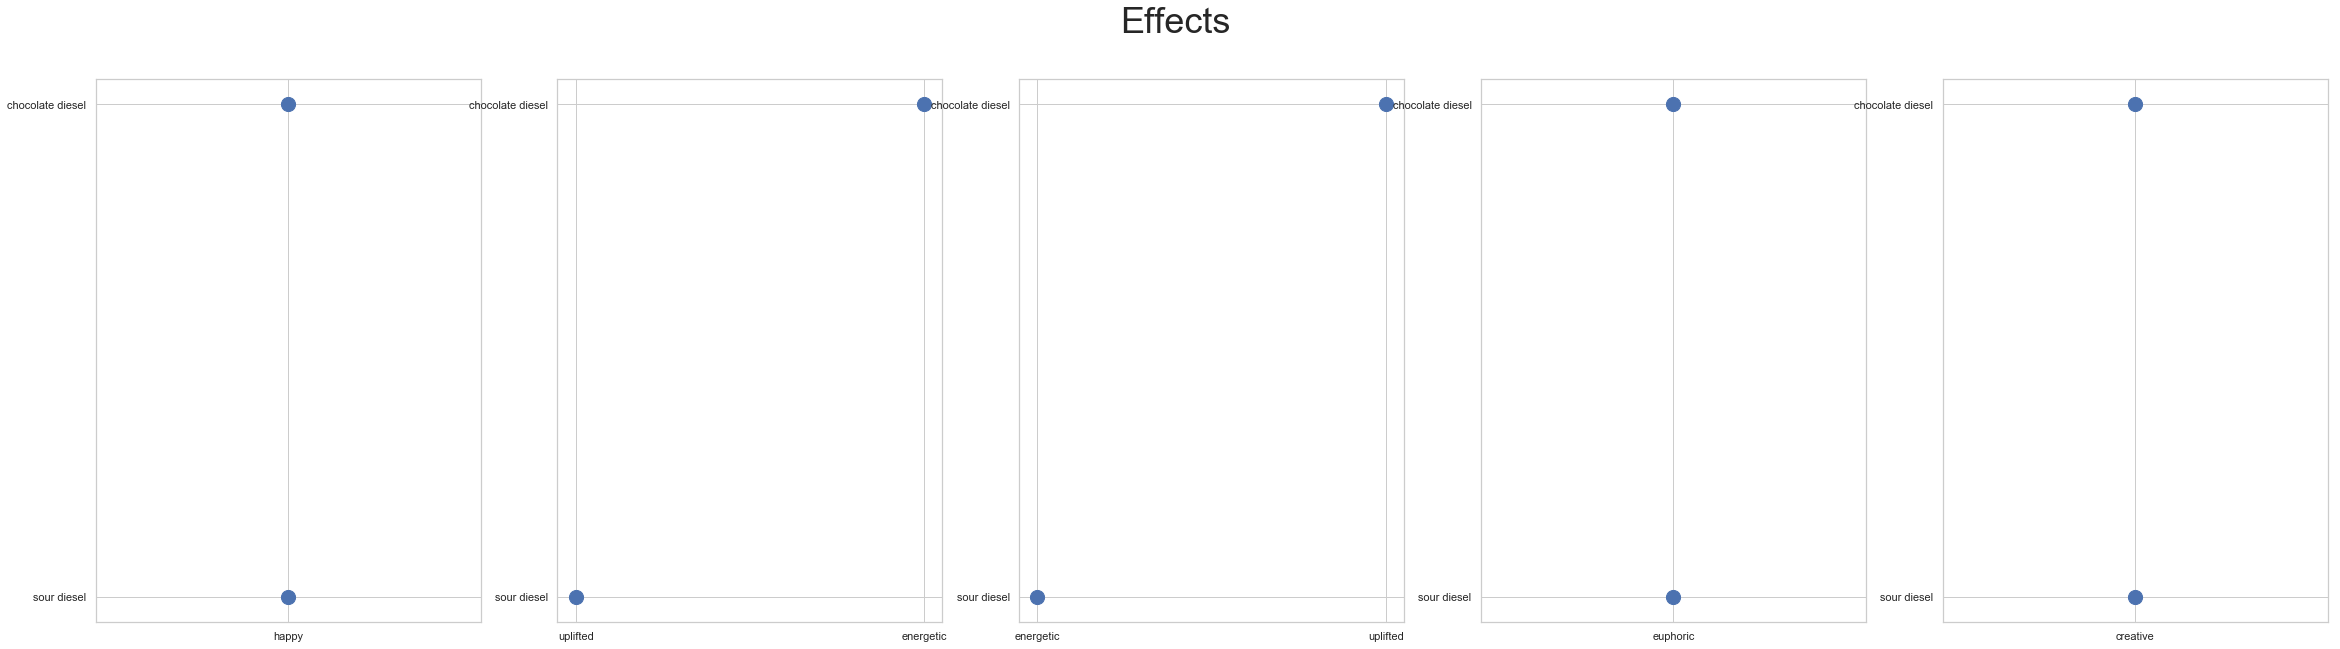

In [45]:
names = list(test['strain'])
values1 = list(test['effect_1'])
values2 = list(test['effect_2'])
values3 = list(test['effect_3'])
values4 = list(test['effect_4'])
values5 = list(test['effect_5'])

fig, axs = plt.subplots(1, 5, figsize=(40, 10), sharey=False)
axs[0].scatter(values1, names, s=200)
axs[1].scatter(values2, names, s=200)
axs[2].scatter(values3, names, s=200)
axs[3].scatter(values4, names, s=200)
axs[4].scatter(values5, names, s=200)


fig.suptitle('Effects', fontsize=36)
plt.show()

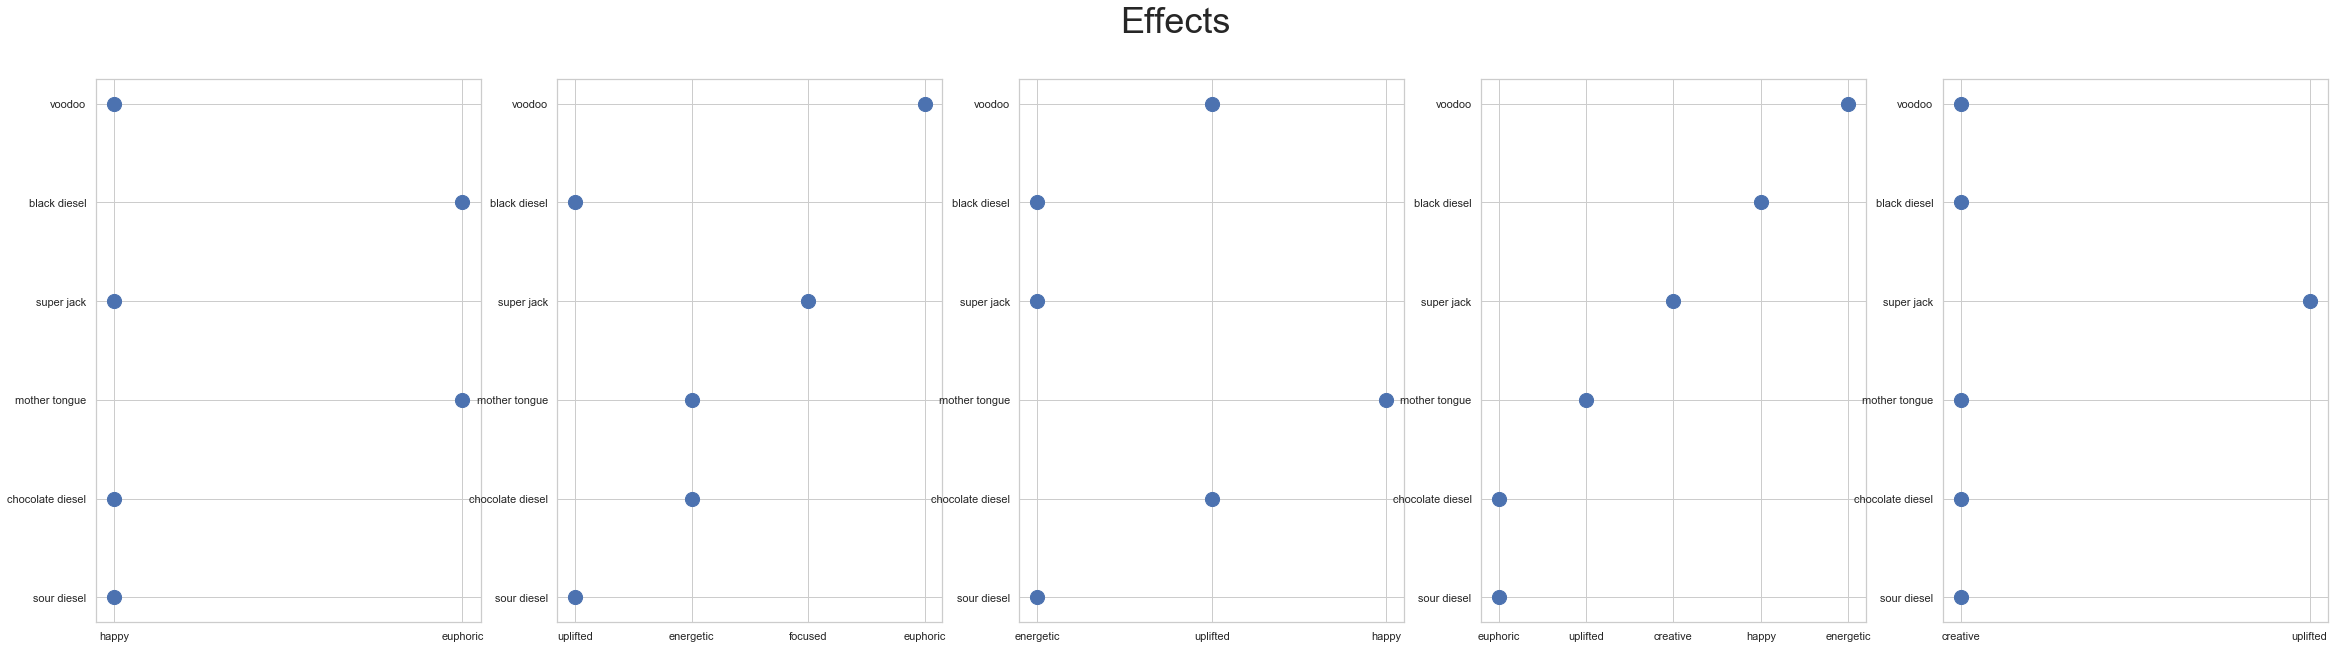

In [46]:
names = list(table1v['strain'])
values1 = list(table1v['effect_1'])
values2 = list(table1v['effect_2'])
values3 = list(table1v['effect_3'])
values4 = list(table1v['effect_4'])
values5 = list(table1v['effect_5'])

fig, axs = plt.subplots(1, 5, figsize=(40, 10), sharey=False)
axs[0].scatter(values1, names, s=200)
axs[1].scatter(values2, names, s=200)
axs[2].scatter(values3, names, s=200)
axs[3].scatter(values4, names, s=200)
axs[4].scatter(values5, names, s=200)


fig.suptitle('Effects', fontsize=36)
plt.show()

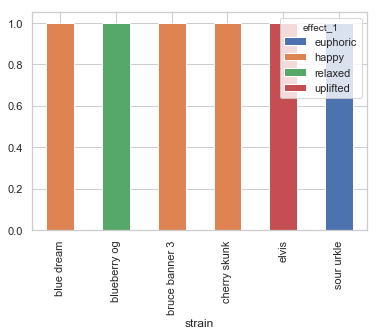

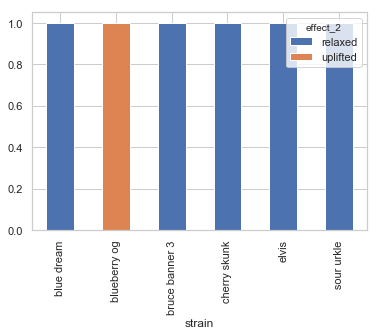

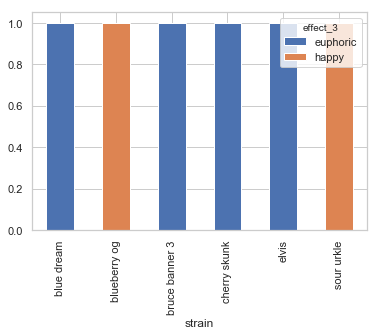

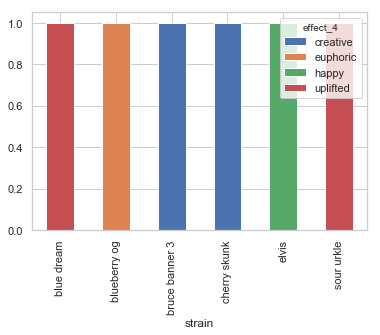

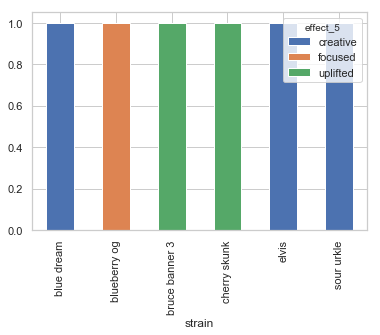

In [113]:
plot(table1v, 'effect')

### GUI

In [48]:
root = tk.Tk()

HEIGHT = 400
WIDTH = 600

canvas = tk.Canvas(root, height = HEIGHT, width = WIDTH)
canvas.pack()

# background_image = tk.PhotoImage(file = 'leaf_shot1.png')
# background_label = tk.Label(root, image = background_image)
# background_label.place(relwidth = 1, relheight = 1)

frame = tk.Frame(root, bg = '#3fa540', bd = 5)
frame.place(relx = 0.5, rely = 0.1, relwidth = 0.75, relheight = 0.1, anchor = 'n')

entry = tk.Entry(frame, font = 40)
entry.place(relwidth = 0.65, relheight = 1)

button = tk.Button(frame, text = 'Find Alternative', font = 40, command = lambda: recommended_strains(entry.get()))
button.place(relx = 0.7, relheight = 1, relwidth = 0.3)


lower_frame = tk.Frame(root, bg = '#3fa540', bd = 10)
lower_frame.place(relx = 0.5, rely = 0.25, relwidth = 0.75, relheight = 0.6, anchor = 'n')

label = tk.Label(lower_frame)
label.place(relwidth = 1, relheight = 1)




root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-48-ae6c72ed0e76>", line 19, in <lambda>
    button = tk.Button(frame, text = 'Find Alternative', font = 40, command = lambda: recommended_strains(entry.get()))
  File "<ipython-input-38-44f4bbee5e27>", line 13, in recommended_strains
    idx = unedited_df[unedited_df['strain']==strain].index[0]
  File "/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 3958, in __getitem__
    return getitem(key)
IndexError: index 0 is out of bounds for axis 0 with size 0
Exception in Tkinter callback
Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-48-ae6c72ed0e76>", line 19, in <lambda>
    button = tk.Button(frame, text = 'Find Alternative', font = 40, command = lambda: rec

### Set Up For Qualitative Polling

In [91]:
# collect 10 random samples from dataframe

final_df.sample(n=10, random_state=17)

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

I'm going to take the 10 randomly selected strains and for each strain randomly select 2 strains to go with the number one recommended strain in a survey for each randomly selected strain.

In [92]:
# find top recommendation for each strain and put into a table

def rec_survey(strain):
    recommended_strains(strain)
    tablev1 = build_comp_table_vec(unedited_df, strain)
    return tablev1.iloc[:2,:-2]

In [93]:
# Blue Zkittlex rec

rec_survey('blue zkittlez')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
375,blue zkittlez,relaxed,sleepy,happy,hungry,uplifted,stress,pain,depression,inflammation,insomnia,drymouth,dryeyes,headache,dizzy,anxious,sweet,berry,citrus
716,dj short blueberry,relaxed,sleepy,happy,euphoric,uplifted,stress,pain,depression,insomnia,inflammation,drymouth,dryeyes,anxious,dizzy,headache,blueberry,sweet,berry


In [94]:
#random blue zkittlez sample answers for survey

final_df.sample(n=2, random_state=11)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [95]:
# Old Toby rec

rec_survey('old toby')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
1787,old toby,creative,happy,energetic,euphoric,relaxed,stress,cramps,fatigue,pain,depression,dryeyes,drymouth,none,none,none,lime,pine,chemical
1194,heavenly og,euphoric,happy,relaxed,energetic,creative,pain,stress,depression,fatigue,none,drymouth,none,none,none,none,earthy,pine,woody


In [96]:
#random blue zkittlez sample answers for survey

final_df.sample(n=2, random_state=101)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [97]:
#Cherry Pie rec

rec_survey('cherry pie')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
575,cherry pie,relaxed,happy,euphoric,uplifted,giggly,stress,depression,pain,insomnia,lackofappetite,drymouth,dryeyes,dizzy,anxious,paranoid,sweet,berry,earthy
318,blue cookies,relaxed,happy,euphoric,uplifted,giggly,stress,depression,insomnia,pain,lackofappetite,drymouth,dryeyes,dizzy,headache,paranoid,blueberry,berry,sweet


In [98]:
# random cherry pie sample answers for survey

final_df.sample(n=2, random_state=15)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [99]:
# Sexxpot Rec

rec_survey('sexxpot')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
2162,sexxpot,aroused,happy,relaxed,euphoric,energetic,pain,stress,fatigue,lackofappetite,musclespasms,drymouth,dryeyes,paranoid,none,none,coffee,pungent,earthy
1363,kelly hill gold,happy,energetic,euphoric,talkative,aroused,pain,stress,cramps,inflammation,musclespasms,dryeyes,drymouth,none,none,none,earthy,pepper,coffee


In [100]:
#random sexxpot sample answers for survey

final_df.sample(n=2, random_state=6)  #sexxpot

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [101]:
# Hoodwreck rec

rec_survey('hoodwreck')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
1232,hoodwreck,euphoric,happy,creative,energetic,focused,fatigue,cramps,depression,eyepressure,headaches,none,none,none,none,none,sweet,earthy,flowery
134,apollo 13 haze,creative,energetic,euphoric,focused,happy,depression,fatigue,none,none,none,anxious,dryeyes,none,none,none,citrus,earthy,flowery


In [102]:
#random hoodwreck sample answers for survey

final_df.sample(n=2, random_state=75)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [103]:
# Madagascar rec

rec_survey('madagascar')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
1545,madagascar,sleepy,happy,euphoric,relaxed,creative,insomnia,stress,pain,headaches,musclespasms,dryeyes,drymouth,dizzy,none,none,earthy,skunk,sweet
746,deep chunk,relaxed,happy,euphoric,sleepy,creative,insomnia,stress,pain,headaches,musclespasms,drymouth,none,none,none,none,earthy,lavender,sweet


In [104]:
#random madagascar sample answers for survey

final_df.sample(n=2, random_state=8)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [105]:
# Purple Star rec

rec_survey('purple star')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
2019,purple star,focused,relaxed,happy,creative,tingly,pain,insomnia,stress,depression,inflammation,dryeyes,drymouth,anxious,dizzy,none,berry,grape,earthy
1245,humboldt headband,euphoric,relaxed,happy,sleepy,focused,stress,depression,insomnia,lackofappetite,pain,dizzy,drymouth,anxious,dryeyes,none,berry,grape,sweet


In [106]:
#random purple star sample answers for survey

final_df.sample(n=2, random_state=987)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [107]:
# God Bud rec

rec_survey('god bud')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
1023,god bud,relaxed,happy,euphoric,sleepy,hungry,stress,depression,insomnia,pain,fatigue,drymouth,dryeyes,paranoid,dizzy,headache,earthy,pungent,woody
2810,the hog,sleepy,relaxed,euphoric,happy,tingly,stress,depression,pain,headaches,insomnia,drymouth,dryeyes,dizzy,headache,paranoid,earthy,pungent,woody


In [108]:
#random god bud sample answers for survey

final_df.sample(n=2, random_state=1008)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [109]:
# Super Sour Diesel rec

rec_survey('super sour diesel')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
2403,super sour diesel,happy,euphoric,relaxed,energetic,uplifted,stress,depression,pain,fatigue,headaches,drymouth,dryeyes,headache,dizzy,paranoid,diesel,citrus,pungent
2263,sour jack,focused,energetic,uplifted,happy,euphoric,depression,stress,fatigue,headaches,pain,drymouth,dizzy,paranoid,dryeyes,headache,citrus,diesel,lemon


In [110]:
#random super sour diesel sample answers for survey

final_df.sample(n=2, random_state=732)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [111]:
# Truffula Tree rec

rec_survey('truffula tree')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
2574,truffula tree,aroused,creative,energetic,euphoric,giggly,none,none,none,none,none,none,none,none,none,none,sweet,none,none
94,alley cat kush,aroused,creative,energetic,euphoric,focused,none,none,none,none,none,none,none,none,none,none,none,none,none


In [112]:
#random truffula tree sample answers for survey

final_df.sample(n=2, random_state=10)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [ ]:
plot()

In [ ]:
plot(table2, 'effect')

In [ ]:
plot(table2, 'medical')

In [ ]:
plot(table2, 'negative')

In [ ]:
plot(table2, 'flavor')

In [ ]:
# Setting the positions and width for the bars
pos = list(range(len(table2['effect_1']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(table2.groupby(['strain','effect_1']))

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar(table2['strain'],
        
        #[p + width for p in pos], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E')
        # with label the second value in first_name
        #label=table2['strain'][1] 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar(table2['strain'],
        [p + width*2 for p in pos], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222') 
        # with label the third value in first_name
        #label=table2['strain'][2]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Effect_1 Outcomes')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
#ax.set_xticklabels(unedited_df['first_name'])

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(table2['pre_score'] + table2['mid_score'] + table2['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['Pre Score', 'Mid Score', 'Post Score'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
final_df['strain'].isin(unedited_df['strain']).value_counts()

In [ ]:
#for blue dream, from vectorized tokens 

#['cherry skunk', 'elvis', 'gsc', 'purple trainwreck', 'blueberry og']

In [ ]:
pd.value_counts(unedited_df['effect_1']).plot.bar()
plt.show()

In [ ]:
pd.value_counts(unedited_df['effect_2']).plot.bar()
plt.show()

In [ ]:
pd.value_counts(unedited_df['effect_3']).plot.bar()
plt.show()

In [ ]:
pd.value_counts(unedited_df['effect_4']).plot.bar()
plt.show()

In [ ]:
pd.value_counts(unedited_df['effect_5']).plot.bar()
plt.show()

In [ ]:
root = tk.Tk()

HEIGHT = 400
WIDTH = 600


canvas = tk.Canvas(root, height = HEIGHT, width = WIDTH)
canvas.pack()

# background_image = tk.PhotoImage(file = 'leaf_shot1.png')
# background_label = tk.Label(root, image = background_image)
# background_label.place(relwidth = 1, relheight = 1)

frame = tk.Frame(root, bg = '#3fa540', bd = 5)
frame.place(relx = 0.5, rely = 0.1, relwidth = 0.75, relheight = 0.1, anchor = 'n')

entry = tk.Entry(frame, font = 40)
entry.place(relwidth = 0.65, relheight = 1)

button = tk.Button(frame, text = 'Find Alternative', font = 40, command = lambda: test_function(entry.get()))
button.place(relx = 0.7, relheight = 1, relwidth = 0.3)


lower_frame = tk.Frame(root, bg = '#3fa540', bd = 10)
lower_frame.place(relx = 0.5, rely = 0.25, relwidth = 0.75, relheight = 0.6, anchor = 'n')

label = tk.Label(lower_frame)
label.place(relwidth = 1, relheight = 1)




root.mainloop()

### Feature Selection

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [ ]:
pca.fit(features)

In [ ]:
features = pca.transform(features)

In [ ]:
nbrs = NearestNeighbors(n_neighbors=11, algorithm='ball_tree', metric='euclidean').fit(features)

In [ ]:
def get_index_from_name(strain):
    return final_df[final_df['strain']==strain].index.tolist()[0]

def print_similar_strains(query=None):
    found_id = get_index_from_name(query)
    for id in indices[found_id][1:]:
        print(final_df.ix[id]['strain'])

In [ ]:
print_similar_strains('chemdog')

In [ ]:
X.columns

#### Use F-Test to View Top Variables

In [ ]:
selector=SelectKBest(f_regression, k=40)
selector.fit(features, final_df.index)
best_columns = features.columns[selector.get_support()]
other_columns = features.columns[~selector.get_support()]

In [ ]:
best_columns

#### Use Recursive Feature Elimination

In [ ]:
ols = linear_model.LinearRegression()
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')
selector.fit(features, final_df.index)

In [ ]:
selected_columns = features.columns[selector.support_]
removed_columns = features.columns[~selector.support_]

In [ ]:
selected_columns

In [ ]:
removed_columns

#### Removing Variables Based on Correlation Coeeficient

In [ ]:
#Plots a heatmap of correlation between features with masking
fig, ax = tqdm(plt.subplots(figsize=(20,20)))
mask=tqdm(np.zeros_like(final_df.corr(), dtype=np.bool))
mask[np.triu_indices_from(mask)] = True
color_map = sns.color_palette("hot_r")
ax = sns.heatmap(final_df.corr(), cmap = color_map, mask=mask, square=True, annot=True)

#### Modeling with Removed Features